In [1]:
import pandas as pd
from scipy import stats

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

In [3]:
data_dams = pd.read_csv(r"C:\Users\samba\Downloads\wb_database_dams.csv",encoding= 'Latin1')

In [4]:
data_dams.rename({'Near_city':'District'},axis = 'columns',inplace = True)

In [5]:
data_dams

,Country,ISO,Name,Purpose,Admin_unit,District,Dam_height,Storage_capacity,Surface_area
0,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.460,3.12000
1,India,IND,Cumbhum,Irrigation,Andhra Pradesh,Ongole,18.00,105.330,23.32700
2,India,IND,Chandra Prabha,Irrigation,Uttar Pradesh,Varanasi,20.12,113.267,163.36400
3,India,IND,Rajsamand,Irrigation,Rajasthan,Kankroli,17.80,98.650,7.79000
4,India,IND,Barwa,Irrigation,Uttar Pradesh,Jhansi,21.03,10.200,70.85000
...,...,...,...,...,...,...,...,...,...
3041,India,IND,Kandleru,Irrigation,Andhra Pradesh,Neilor,49.00,1690.000,0.14232
3042,India,IND,Pulichintala Project,Irrigation,Andhra Pradesh,Jaggayyaoeta,37.24,1050.000,NaN
3043,India,IND,North Koel,"Irrigation, Hydropower",Jharkhand,Daltonnganj,67.86,960.000,0.07120
3044,India,IND,Icha At Kuju,Irrigation,Jharkhand,Chailbasa,39.50,930.000,0.12700


In [6]:
data_dams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           3046 non-null   object 
 1   ISO               3046 non-null   object 
 2   Name              3046 non-null   object 
 3   Purpose           3046 non-null   object 
 4   Admin_unit        3044 non-null   object 
 5   District          3040 non-null   object 
 6   Dam_height        3019 non-null   float64
 7   Storage_capacity  2888 non-null   float64
 8   Surface_area      2236 non-null   float64
dtypes: float64(3), object(6)
memory usage: 214.3+ KB


In [7]:
data_dams.isnull().sum()

Country               0
ISO                   0
Name                  0
Purpose               0
Admin_unit            2
District              6
Dam_height           27
Storage_capacity    158
Surface_area        810
dtype: int64

In [8]:
data_dams.dtypes

Country              object
ISO                  object
Name                 object
Purpose              object
Admin_unit           object
District             object
Dam_height          float64
Storage_capacity    float64
Surface_area        float64
dtype: object

In [9]:
columns = data_dams.columns

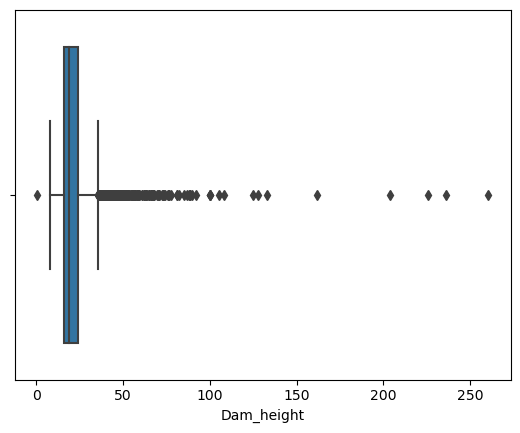

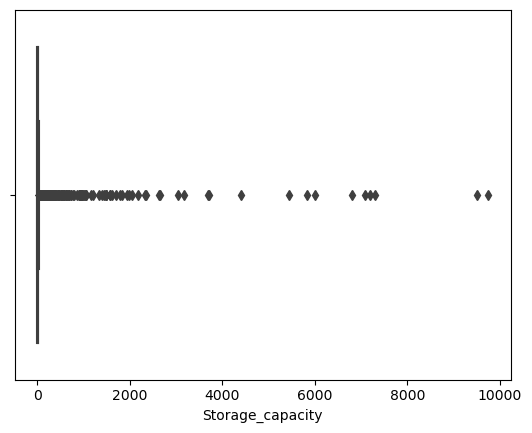

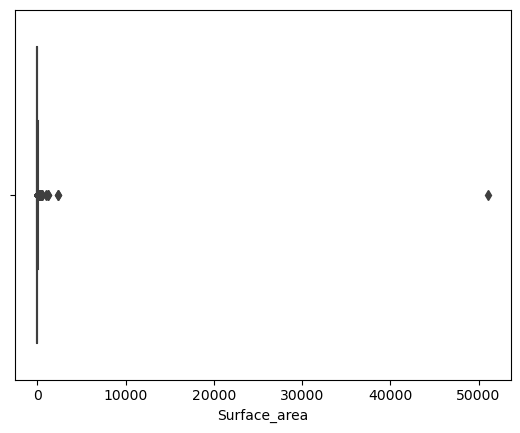

In [10]:
Num_columns = ['Dam_height','Storage_capacity','Surface_area']
for i in Num_columns:
    sns.boxplot(x = data_dams[i])
    plt.show()
    

In [11]:
data_dams.describe()
for i in Num_columns:
    Q1=data_dams.describe().loc["25%",i]
    Q3=data_dams.describe().loc["75%",i]
    IQR=Q3-Q1
    print(i,data_dams.loc[data_dams[i]<(Q1-IQR*1.5),i].count())
    c = (Q1-IQR*1.5)
    print(i,data_dams.loc[data_dams[i]>(Q3+IQR*1.5),i].count())
    b = (Q3+IQR*1.5)

Dam_height 1
Dam_height 264
Storage_capacity 0
Storage_capacity 453
Surface_area 0
Surface_area 402


In [12]:
for i in Num_columns:
    Q1=data_dams.describe().loc["25%",i]
    Q3=data_dams.describe().loc["75%",i]
    IQR=Q3-Q1
    b = (Q3+IQR*1.5)
    c = (Q1-IQR*1.5)
    data_dams[i].mask((data_dams[i]>b),data_dams[i].mean(),inplace =True)
    data_dams[i].mask((data_dams[i]<c),data_dams[i].mean(),inplace =True)

In [13]:
data_dams.isna().sum()

Country               0
ISO                   0
Name                  0
Purpose               0
Admin_unit            2
District              6
Dam_height           27
Storage_capacity    158
Surface_area        810
dtype: int64

In [14]:
cat_columns = list(set(data_dams.columns)-set(['Dam_height','Storage_capacity','Surface_area']))

In [15]:
for i in Num_columns:
    data_dams[i].fillna(data_dams[i].mean(),inplace = True)

In [16]:
for i in cat_columns:
    data_dams[i].fillna(data_dams[i].mode()[0],inplace = True)

In [17]:
for i in Num_columns:
    Q1=data_dams.describe().loc["25%",i]
    Q3=data_dams.describe().loc["75%",i]
    IQR=Q3-Q1
    b = (Q3+IQR*1.5)
    c = (Q1-IQR*1.5)
    data_dams[i].mask((data_dams[i]>b),data_dams[i].mean(),inplace =True)
    data_dams[i].mask((data_dams[i]<c),data_dams[i].mean(),inplace =True)

In [18]:
crops_data = pd.read_csv(r"C:\Users\samba\Downloads\ICRISAT-District Level Data.csv",encoding = 'Latin1')

In [19]:
crops_data.columns

Index(['Year', 'State Name', 'Dist Name', 'RICE AREA (1000 ha)',
       'RICE PRODUCTION (1000 tons)', 'RICE YIELD (Kg per ha)',
       'WHEAT AREA (1000 ha)', 'WHEAT PRODUCTION (1000 tons)',
       'WHEAT YIELD (Kg per ha)', 'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per ha)', 'BARLEY AREA (1000 ha)',
       'BARLEY PRODUCTION (1000 tons)', 'BARLEY YIELD (Kg per ha)',
       'CHICKP

In [20]:
crops_data.isna().sum().sum()

0

In [21]:
crops_data.rename({'Dist Name':'District'},axis = 'columns',inplace = True)

In [22]:
crops_data

,Year,State Name,District,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1966,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,454.55,0.60,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1967,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,520.00,1.10,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1968,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,558.66,0.50,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1969,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,536.44,0.80,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1970,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,656.11,0.90,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,2013,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,1209.15,0.00,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,2014,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,1240.67,0.00,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,2015,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,914.57,0.00,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,2016,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,2167.98,0.00,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [23]:
merged_data = pd.merge(data_dams, crops_data, on='District', how='inner')

In [24]:
merged_data

,Country,ISO,Name,Purpose,Admin_unit,District,Dam_height,Storage_capacity,Surface_area,Year,...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1966,...,10967.74,2.0,0.0,0.00,2.24,4.96,7.20,0.05,2.59,1.29
1,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1967,...,13285.71,3.0,0.0,0.00,1.66,2.96,4.62,0.02,0.66,0.00
2,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1968,...,9096.77,4.4,0.0,0.00,1.95,3.21,5.16,0.00,0.45,0.44
3,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1969,...,9344.83,4.3,0.3,69.77,1.85,2.52,4.36,0.03,0.70,0.96
4,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1970,...,8480.00,4.8,0.4,83.33,2.07,2.45,4.52,0.05,0.60,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33611,India,IND,Vyasi,"Irrigation, Hydropower",Uttaranchal,Dehradun,22.382636,17.601975,0.00965,2013,...,6511.51,0.0,0.0,0.00,2.58,3.40,5.98,1.00,0.05,2.04
33612,India,IND,Vyasi,"Irrigation, Hydropower",Uttaranchal,Dehradun,22.382636,17.601975,0.00965,2014,...,6575.37,0.0,0.0,0.00,2.71,3.43,6.13,0.91,0.05,2.77
33613,India,IND,Vyasi,"Irrigation, Hydropower",Uttaranchal,Dehradun,22.382636,17.601975,0.00965,2015,...,6480.00,0.0,0.0,0.00,2.58,3.93,6.51,0.90,0.07,2.11
33614,India,IND,Vyasi,"Irrigation, Hydropower",Uttaranchal,Dehradun,22.382636,17.601975,0.00965,2016,...,6479.99,0.0,0.0,0.00,2.58,4.32,6.90,0.67,0.06,2.27


In [25]:
merged_Num_columns = list(set(merged_data.columns)-set(['Country','ISO','Name','Purpose','Admin_unit','District','State Name']))

In [26]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33616 entries, 0 to 33615
Data columns (total 86 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Country                                      33616 non-null  object 
 1   ISO                                          33616 non-null  object 
 2   Name                                         33616 non-null  object 
 3   Purpose                                      33616 non-null  object 
 4   Admin_unit                                   33616 non-null  object 
 5   District                                     33616 non-null  object 
 6   Dam_height                                   33616 non-null  float64
 7   Storage_capacity                             33616 non-null  float64
 8   Surface_area                                 33616 non-null  float64
 9   Year                                         33616 non-null  int64  
 10

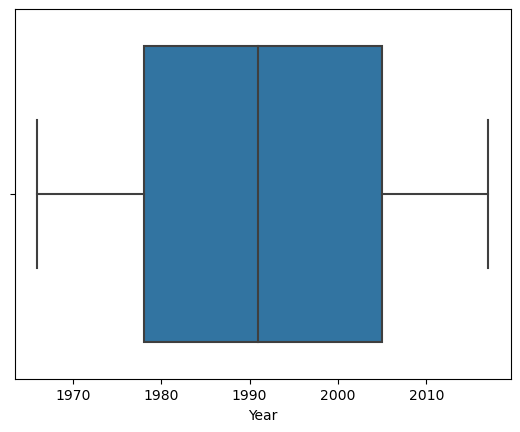

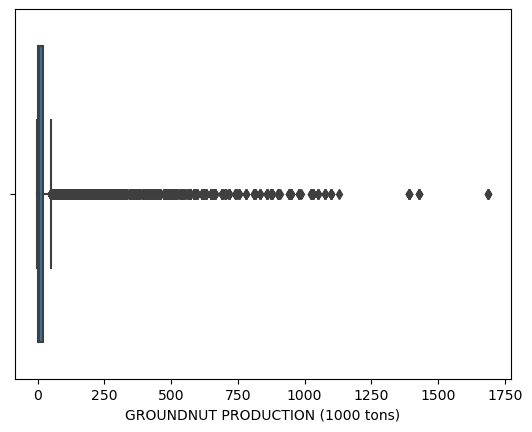

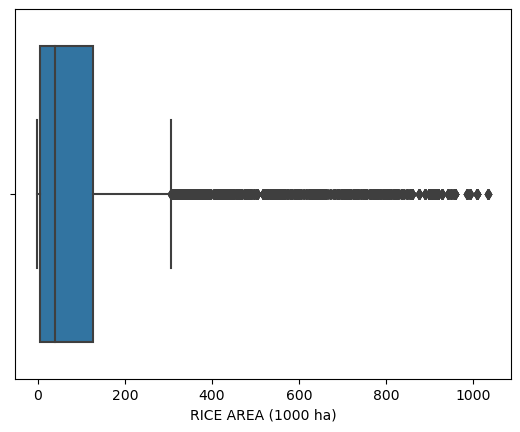

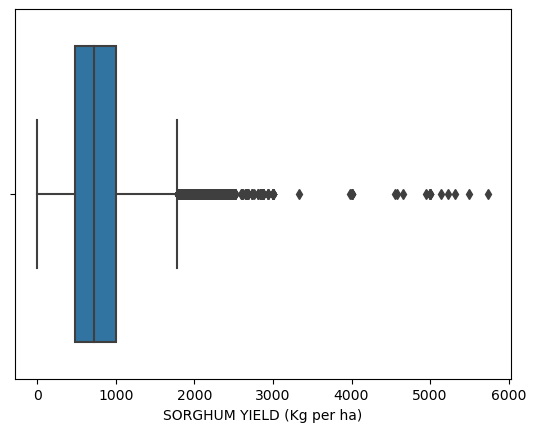

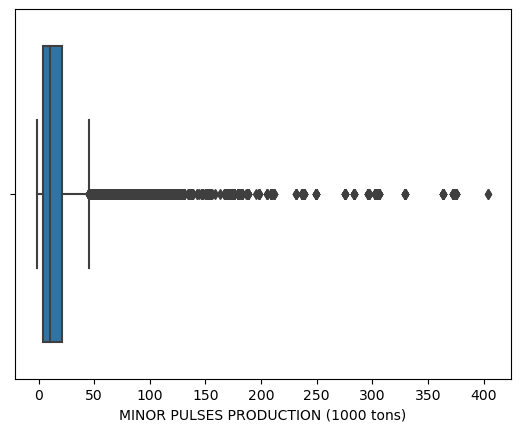

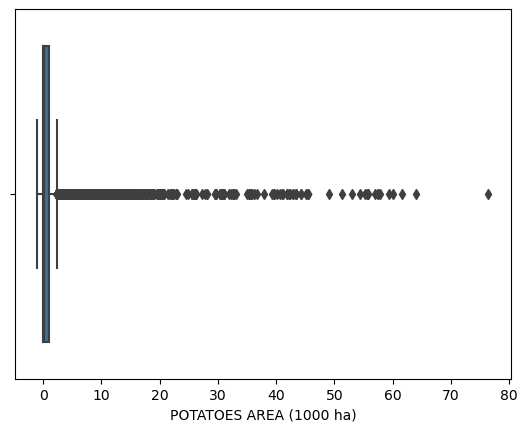

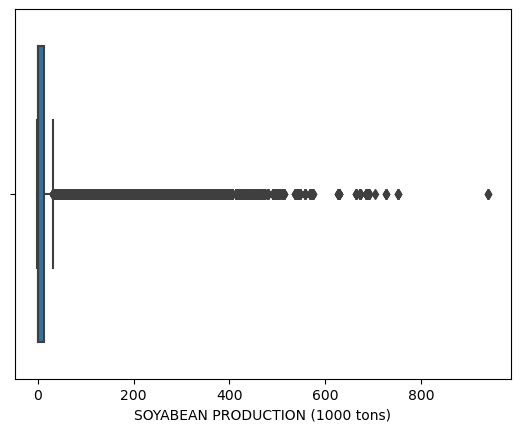

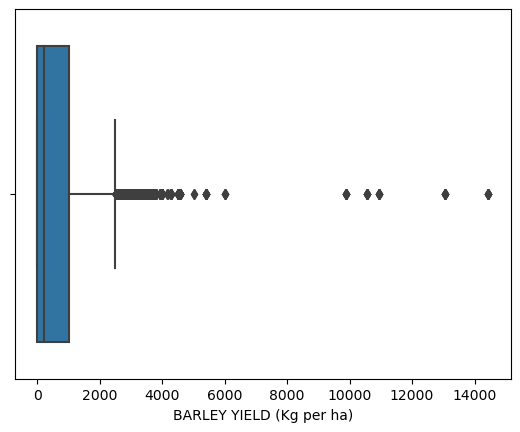

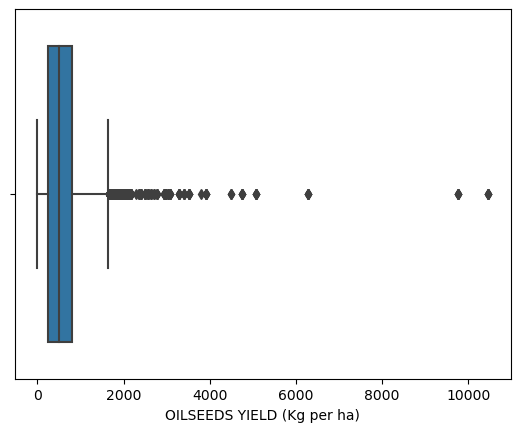

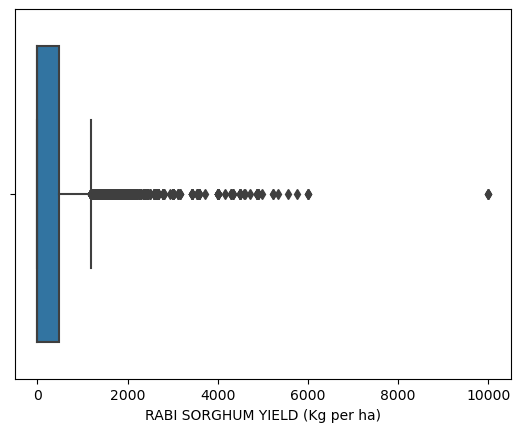

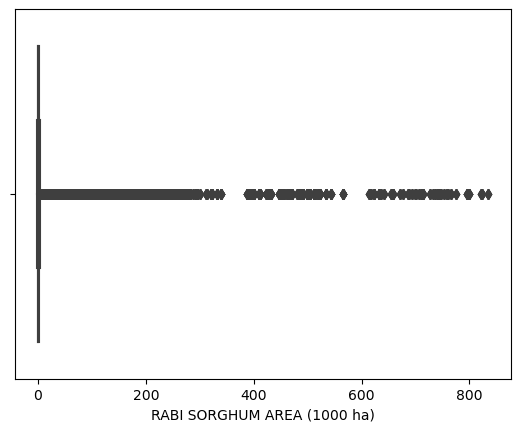

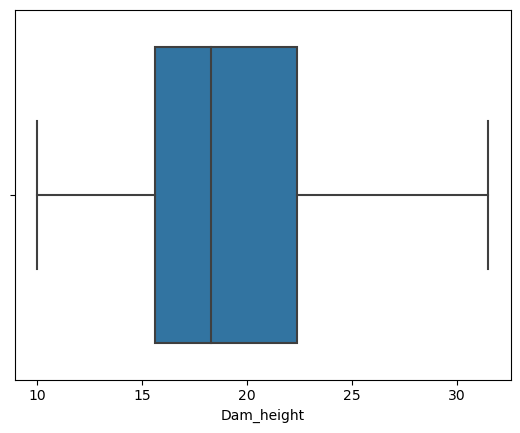

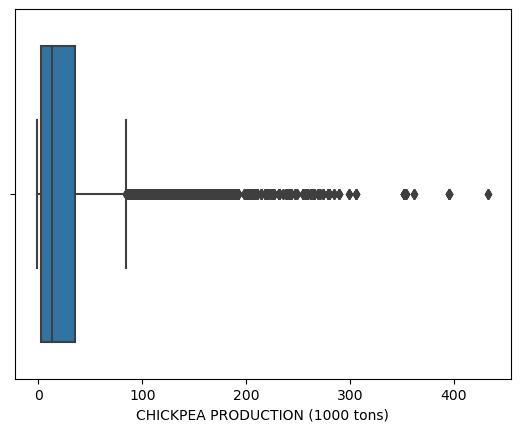

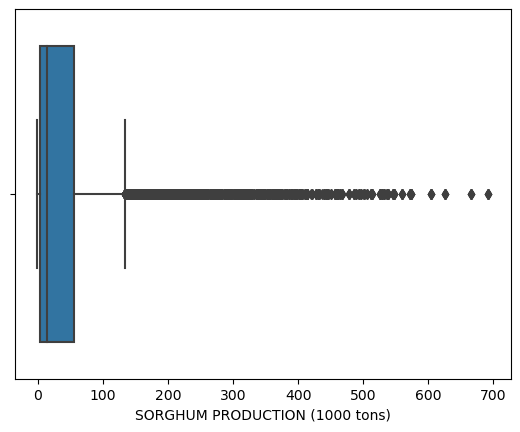

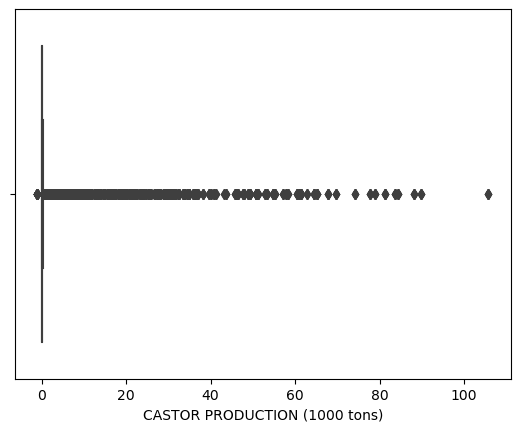

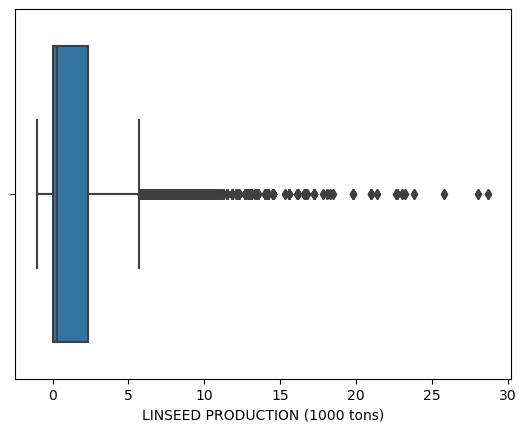

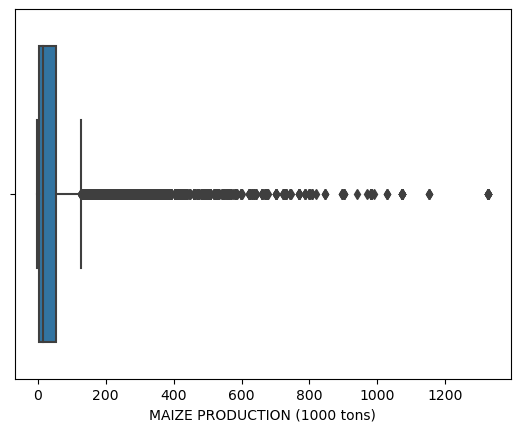

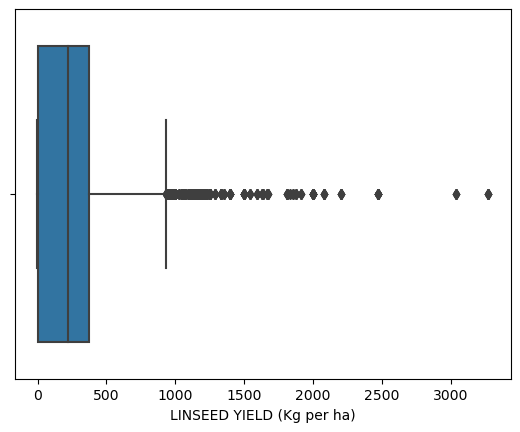

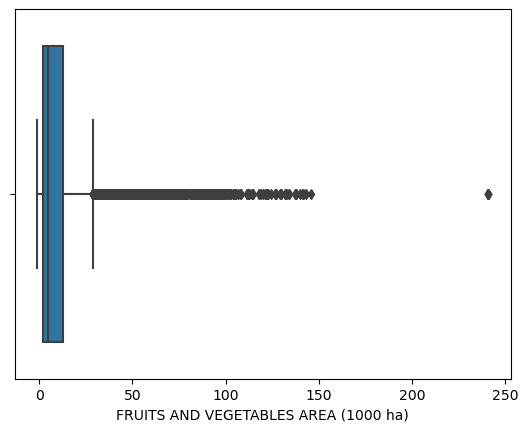

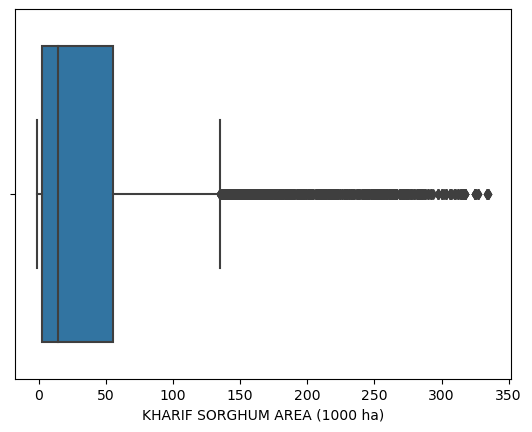

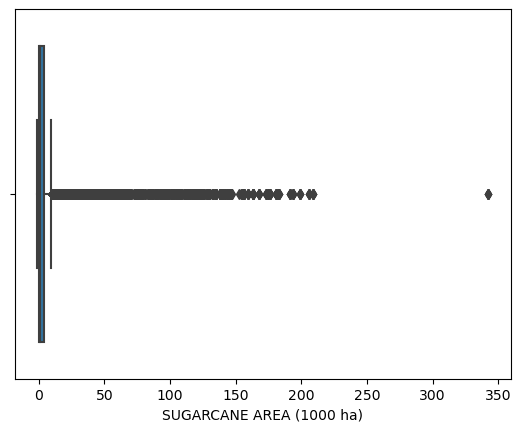

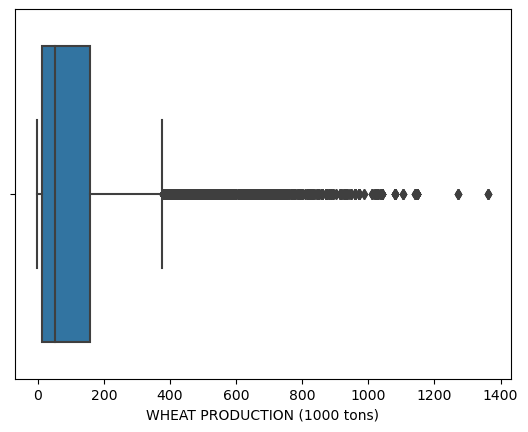

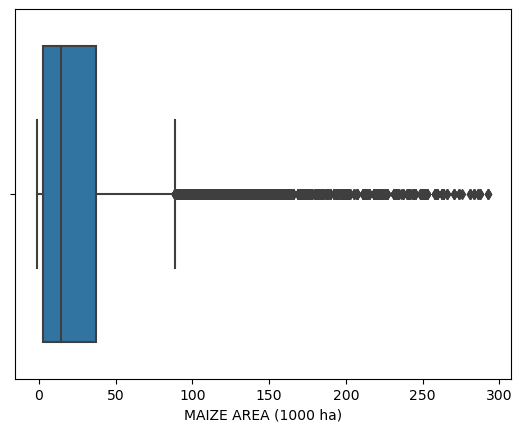

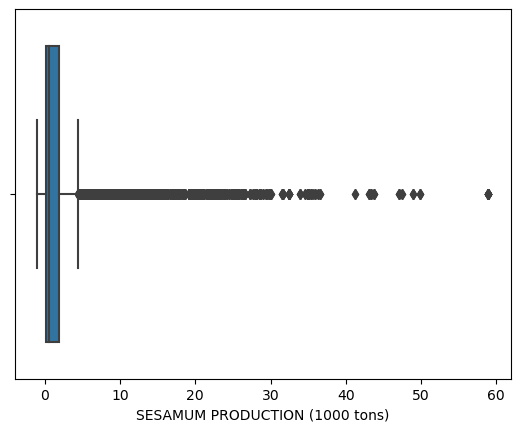

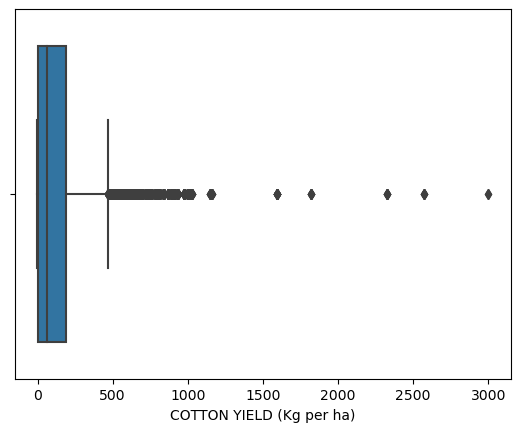

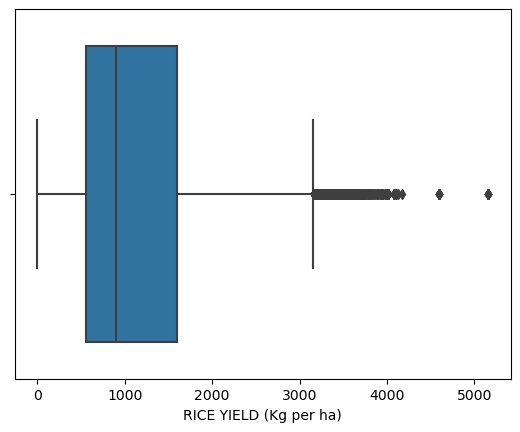

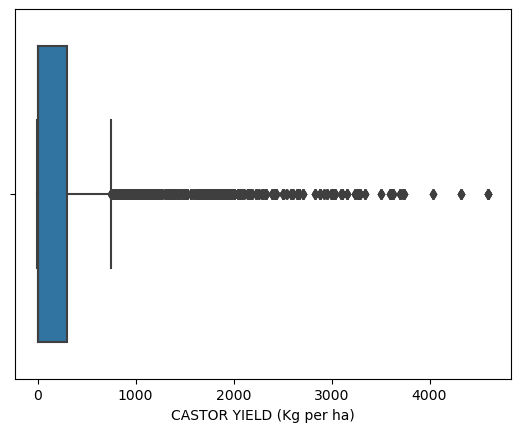

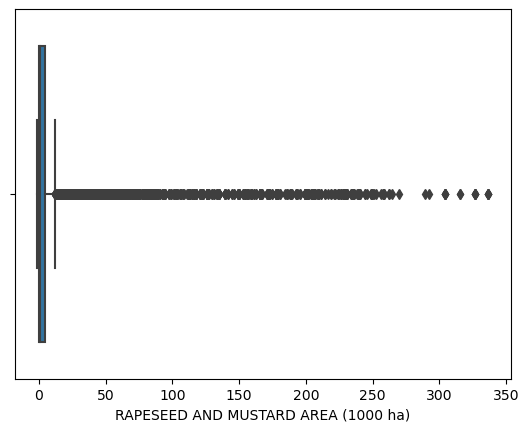

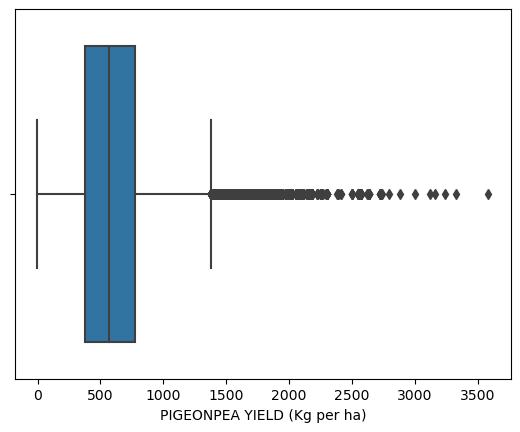

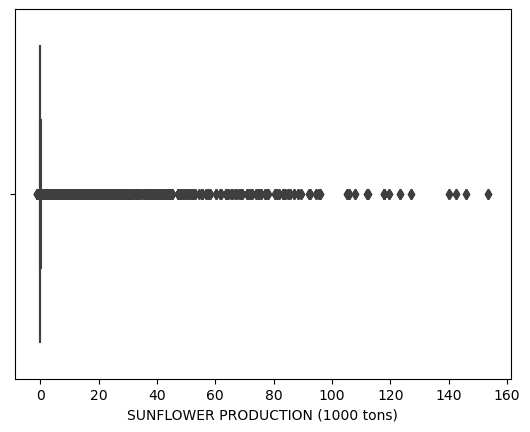

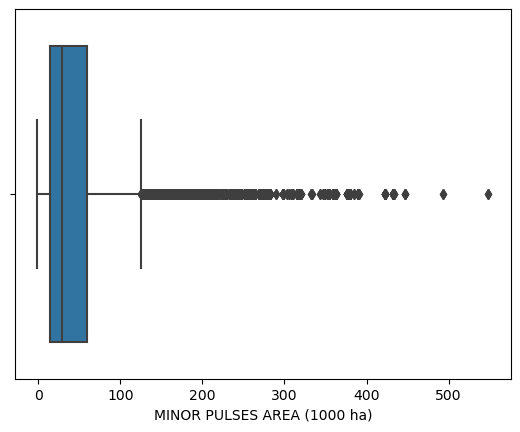

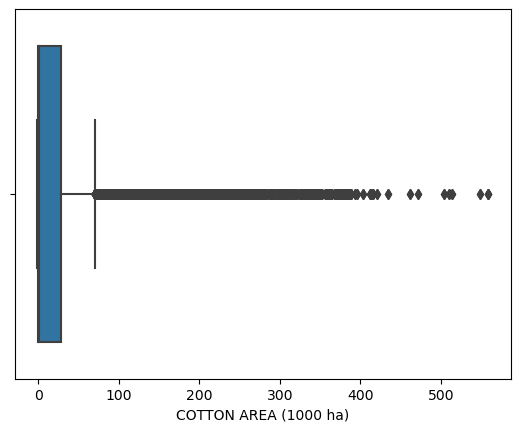

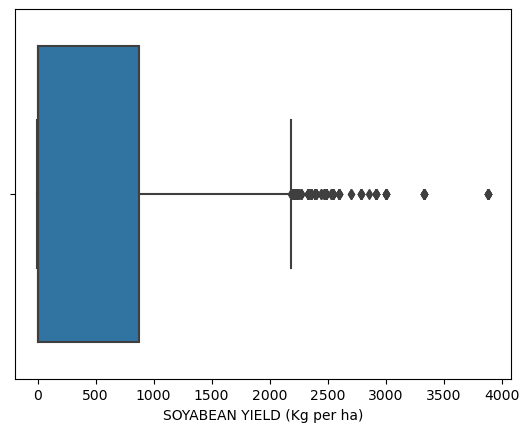

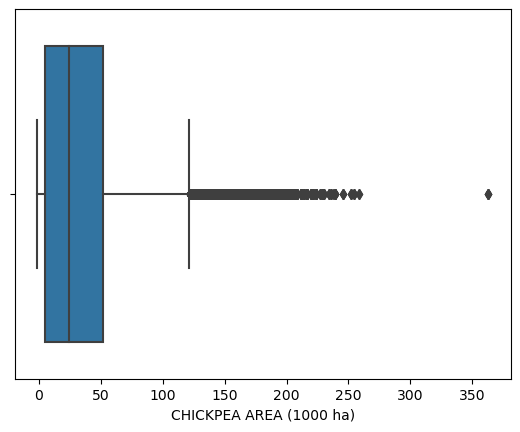

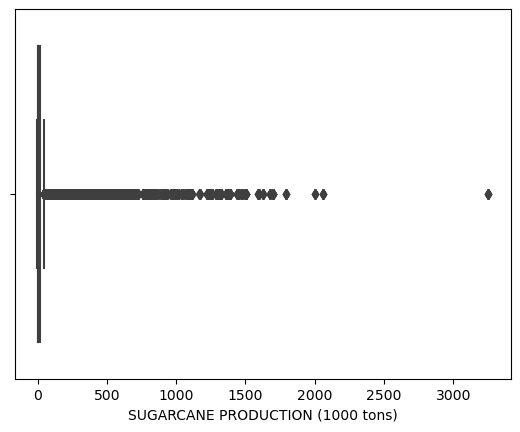

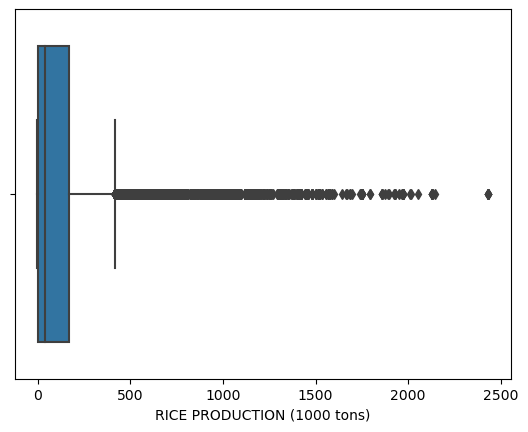

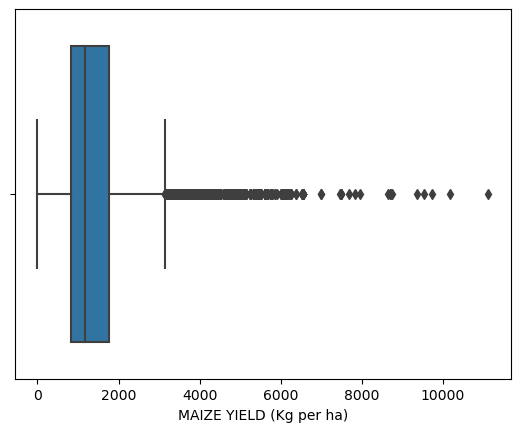

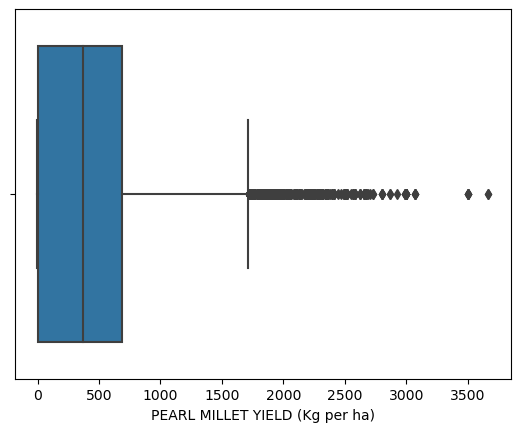

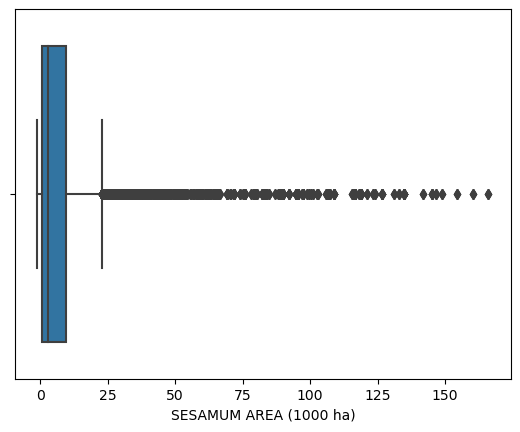

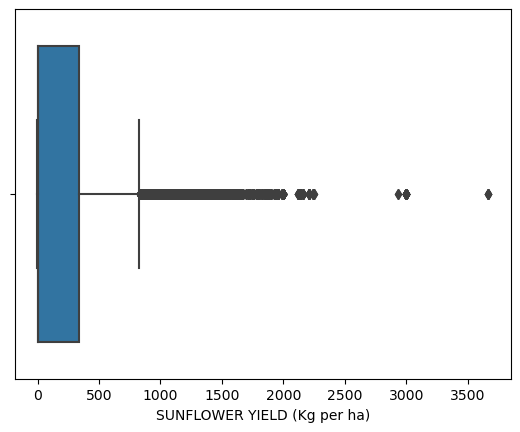

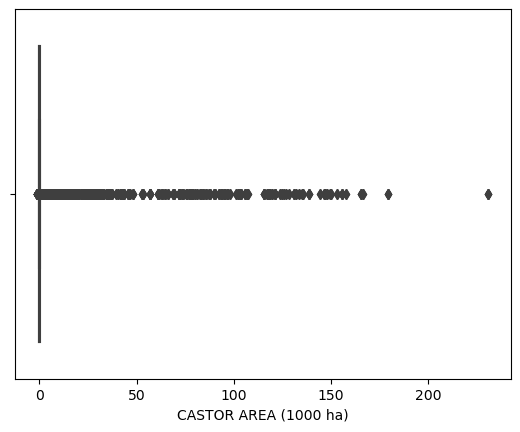

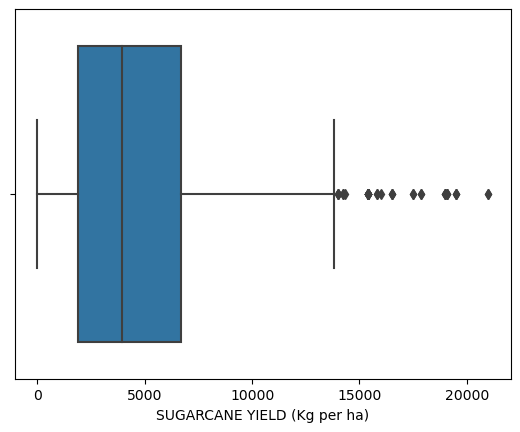

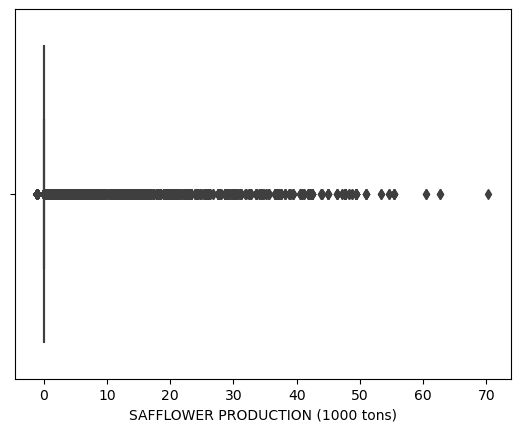

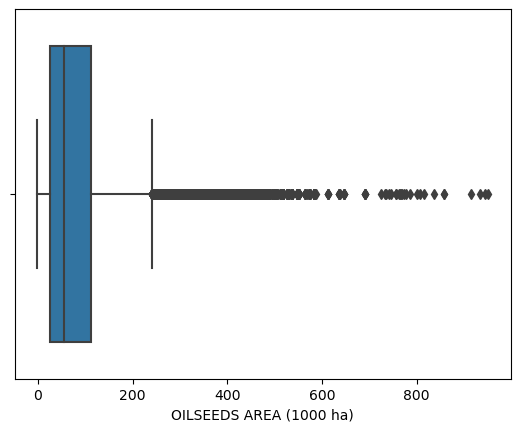

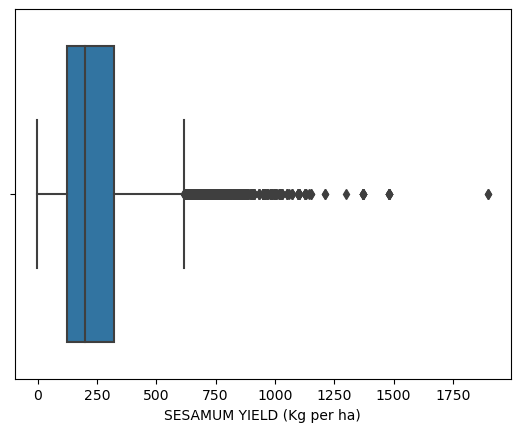

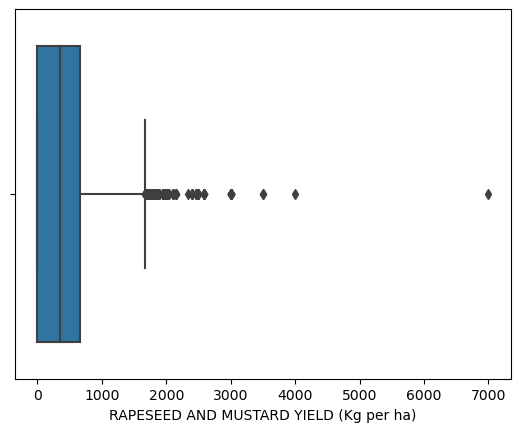

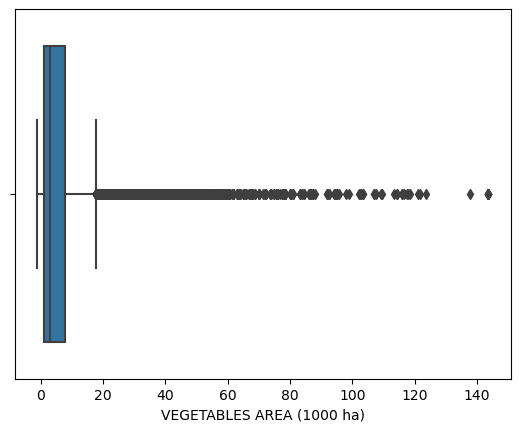

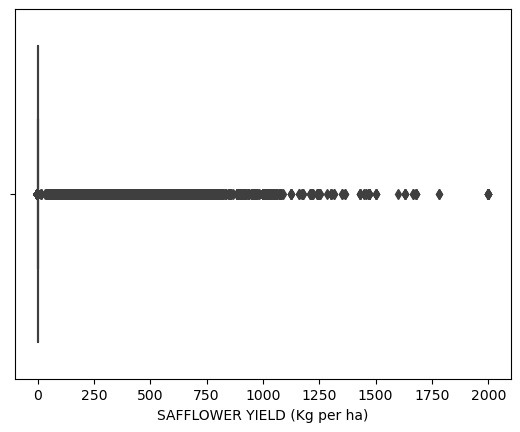

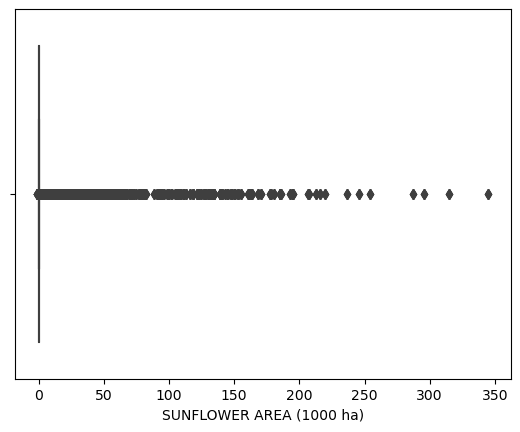

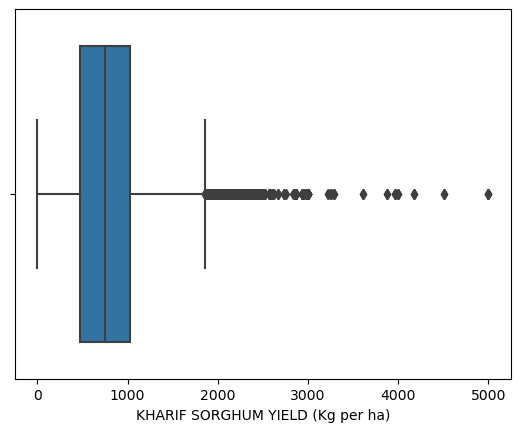

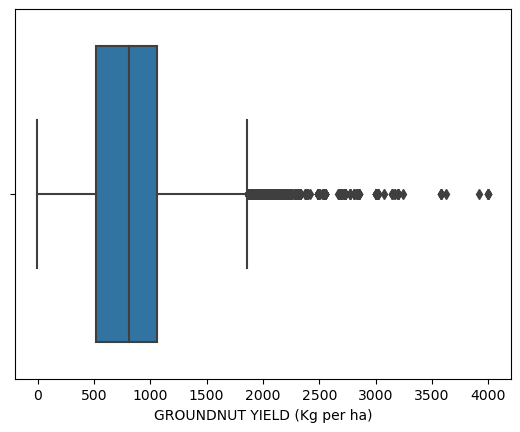

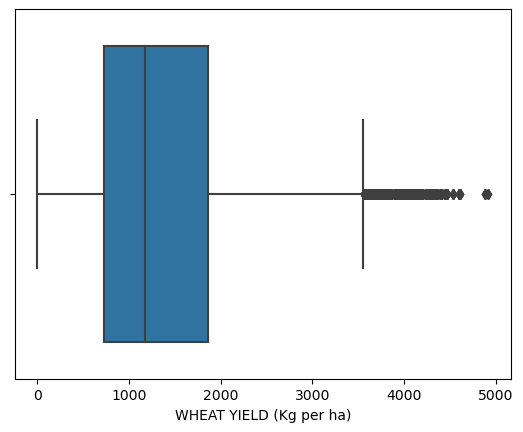

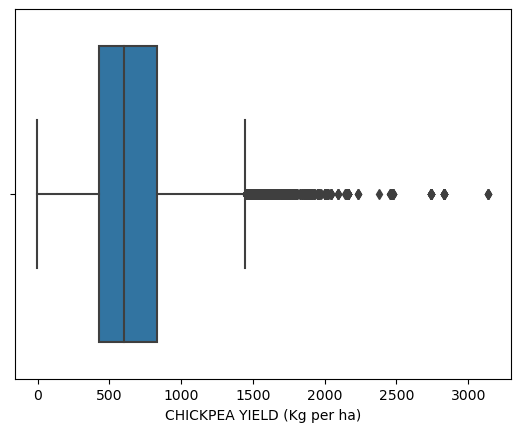

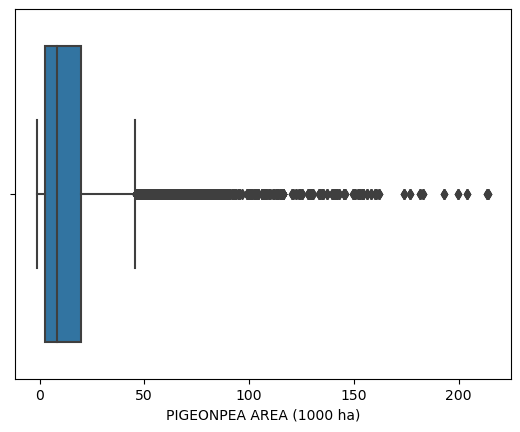

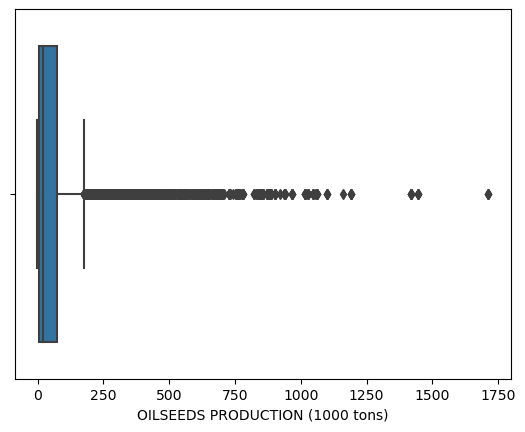

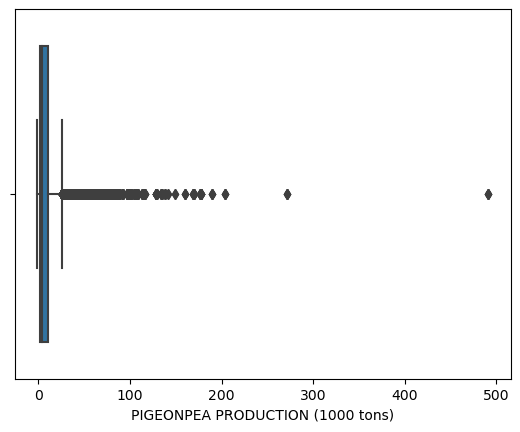

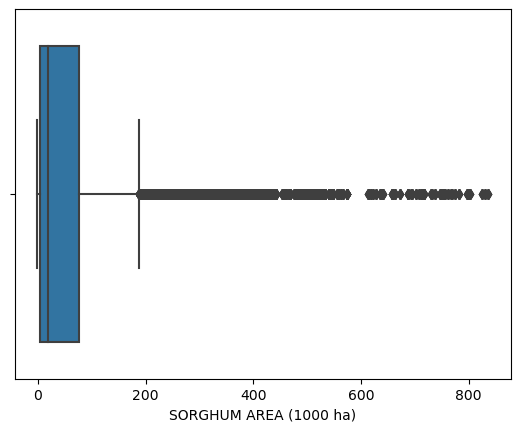

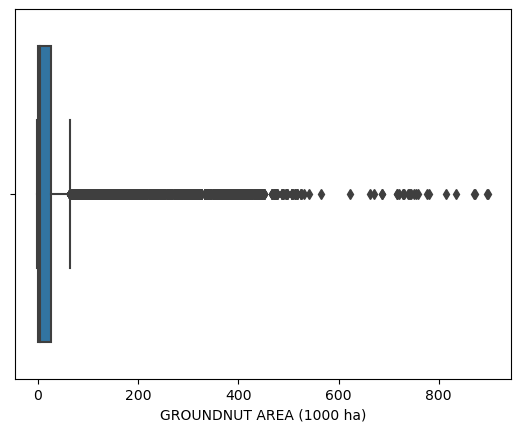

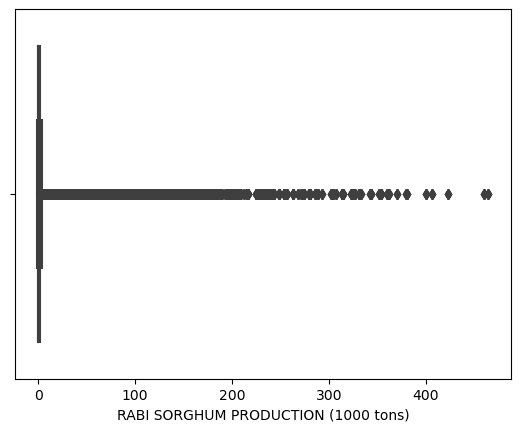

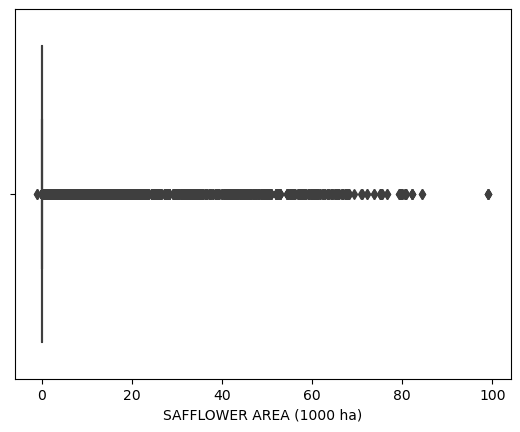

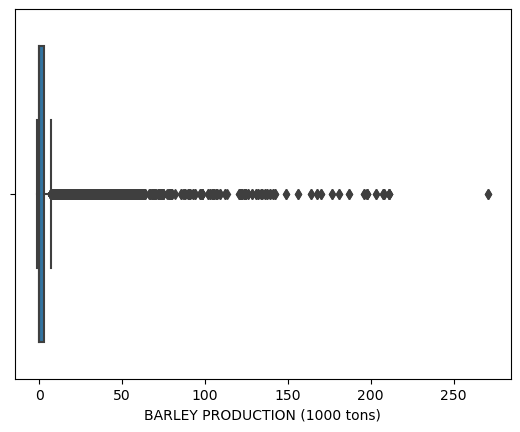

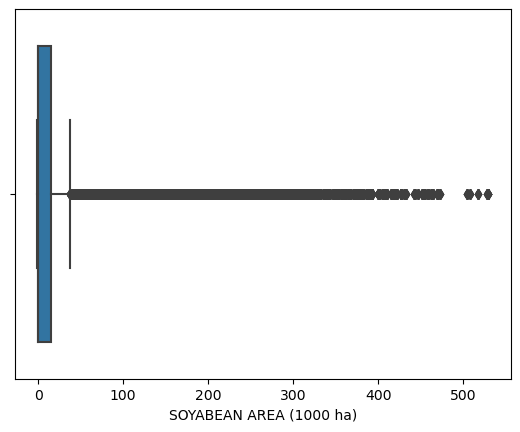

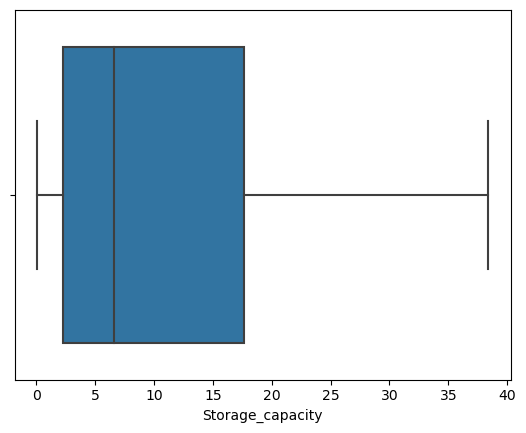

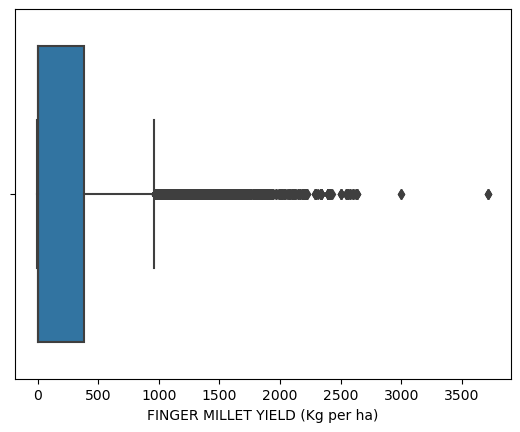

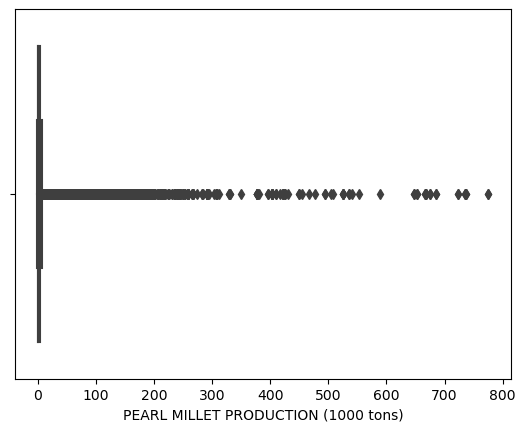

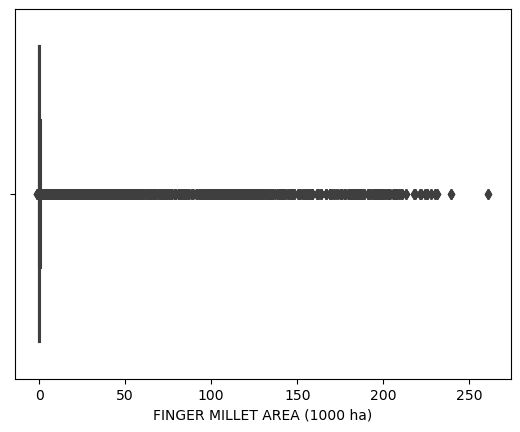

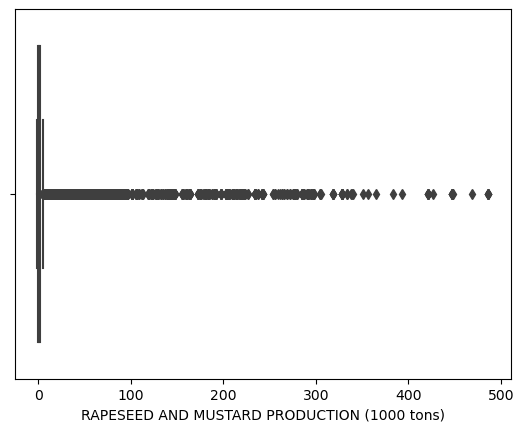

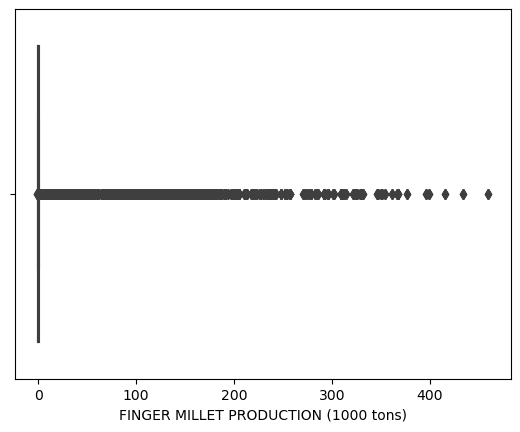

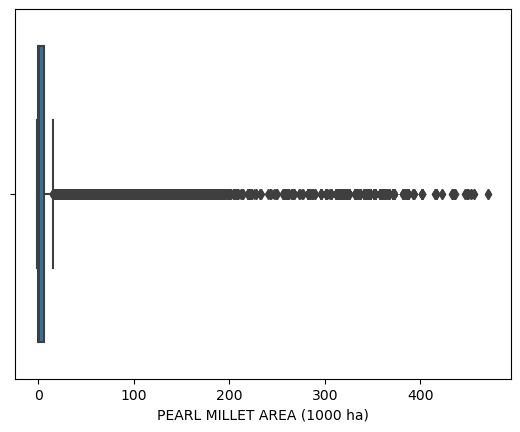

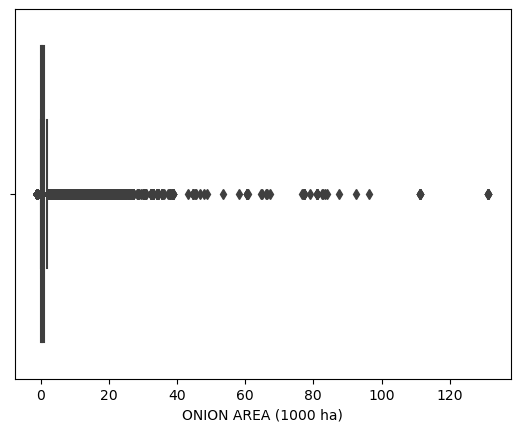

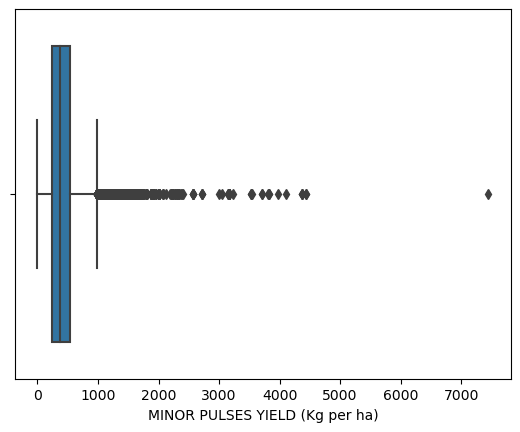

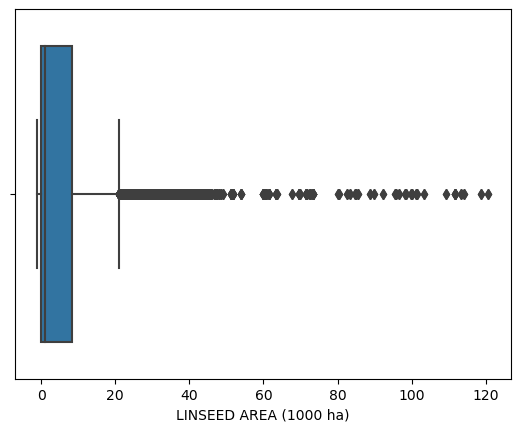

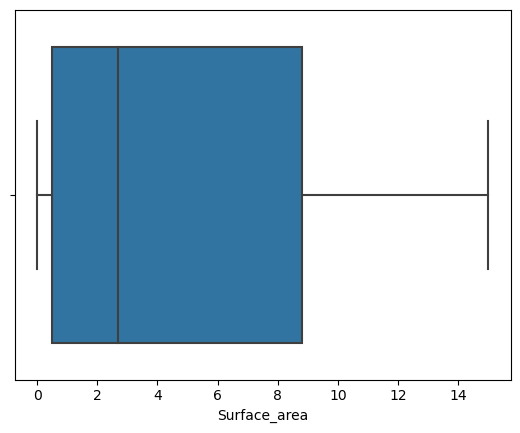

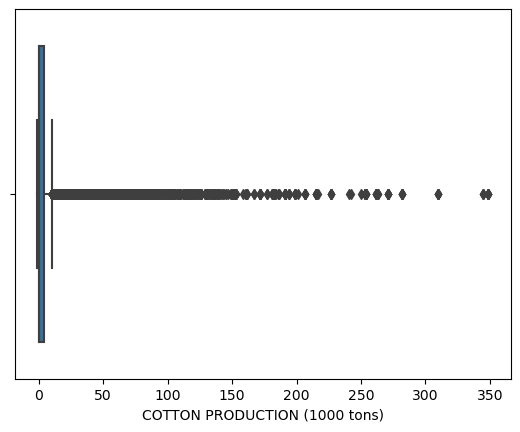

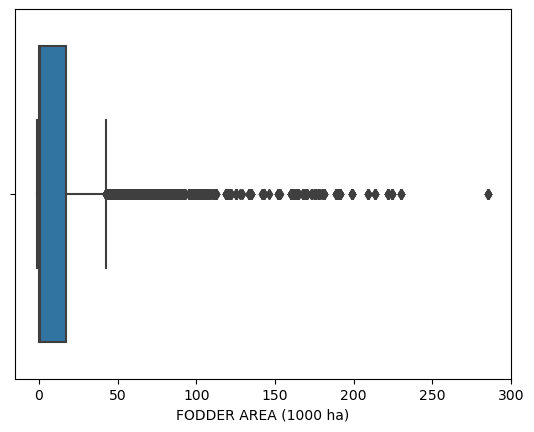

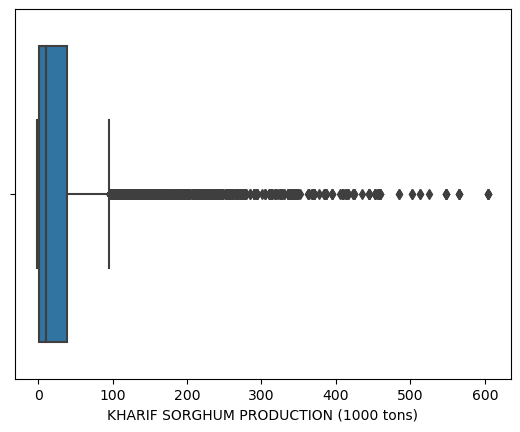

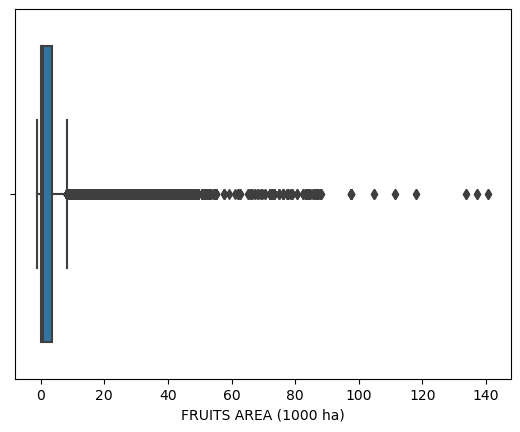

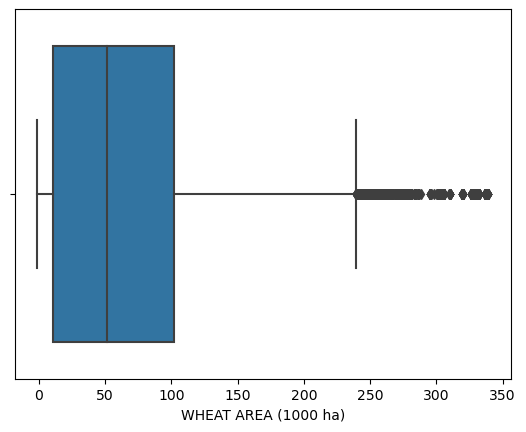

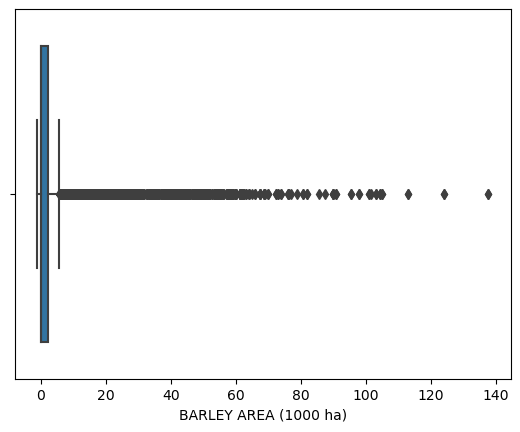

In [27]:
for i in merged_Num_columns:
    sns.boxplot(x= merged_data[i])
    plt.show()

In [28]:
for i in merged_Num_columns:
    Q1=merged_data.describe().loc["25%",i]
    Q3=merged_data.describe().loc["75%",i]
    IQR=Q3-Q1
    b = (Q3+IQR*1.5)
    c = (Q1-IQR*1.5)
    merged_data[i].mask((merged_data[i]>b),merged_data[i].mean(),inplace =True)
    merged_data[i].mask((merged_data[i]<c),merged_data[i].mean(),inplace =True)

In [29]:
merged_data.head(10)

,Country,ISO,Name,Purpose,Admin_unit,District,Dam_height,Storage_capacity,Surface_area,Year,...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1966,...,10967.74,2.0,0.0,0.00,2.24,4.96,7.20,0.05,1.477521,1.29
1,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1967,...,13285.71,3.0,0.0,0.00,1.66,2.96,4.62,0.02,0.660000,0.00
2,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1968,...,9096.77,4.4,0.0,0.00,1.95,3.21,5.16,0.00,0.450000,0.44
3,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1969,...,9344.83,4.3,0.3,69.77,1.85,2.52,4.36,0.03,0.700000,0.96
4,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1970,...,8480.00,4.8,0.4,83.33,2.07,2.45,4.52,0.05,0.600000,0.94
5,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1971,...,8807.69,6.6,0.6,90.91,2.15,3.23,5.38,0.04,0.640000,0.48
6,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1972,...,9951.22,6.8,1.6,235.29,2.18,2.39,4.57,0.04,0.680000,0.33
7,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1973,...,9408.16,6.8,1.2,176.47,2.25,1.83,4.08,0.03,0.410000,0.32
8,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1974,...,6879.31,6.1,1.3,213.11,1.95,1.84,3.79,0.02,0.390000,0.02
9,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.38,12.46,3.12,1975,...,8300.00,7.7,0.8,103.90,2.01,1.86,3.87,0.02,0.390000,0.02


In [30]:
merged_data.isnull().sum().sum()

0

In [31]:
columns = merged_data.columns

In [32]:
for i in columns:
    print(i,merged_data[i].isna().sum())

Country 0
ISO 0
Name 0
Purpose 0
Admin_unit 0
District 0
Dam_height 0
Storage_capacity 0
Surface_area 0
Year 0
State Name 0
RICE AREA (1000 ha) 0
RICE PRODUCTION (1000 tons) 0
RICE YIELD (Kg per ha) 0
WHEAT AREA (1000 ha) 0
WHEAT PRODUCTION (1000 tons) 0
WHEAT YIELD (Kg per ha) 0
KHARIF SORGHUM AREA (1000 ha) 0
KHARIF SORGHUM PRODUCTION (1000 tons) 0
KHARIF SORGHUM YIELD (Kg per ha) 0
RABI SORGHUM AREA (1000 ha) 0
RABI SORGHUM PRODUCTION (1000 tons) 0
RABI SORGHUM YIELD (Kg per ha) 0
SORGHUM AREA (1000 ha) 0
SORGHUM PRODUCTION (1000 tons) 0
SORGHUM YIELD (Kg per ha) 0
PEARL MILLET AREA (1000 ha) 0
PEARL MILLET PRODUCTION (1000 tons) 0
PEARL MILLET YIELD (Kg per ha) 0
MAIZE AREA (1000 ha) 0
MAIZE PRODUCTION (1000 tons) 0
MAIZE YIELD (Kg per ha) 0
FINGER MILLET AREA (1000 ha) 0
FINGER MILLET PRODUCTION (1000 tons) 0
FINGER MILLET YIELD (Kg per ha) 0
BARLEY AREA (1000 ha) 0
BARLEY PRODUCTION (1000 tons) 0
BARLEY YIELD (Kg per ha) 0
CHICKPEA AREA (1000 ha) 0
CHICKPEA PRODUCTION (1000 tons)

In [33]:
merged_data_1 = pd.merge(data_dams, crops_data, on='District', how='right')

In [34]:
merged_data_1

,Country,ISO,Name,Purpose,Admin_unit,District,Dam_height,Storage_capacity,Surface_area,Year,...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,India,IND,Khapri,Irrigation,Chattisgarh,Durg,11.11,12.46,4.7200,1966,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,India,IND,Arjunda,Irrigation,Chattisgarh,Durg,11.10,4.21,0.0122,1966,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
2,India,IND,Khapri,Irrigation,Chattisgarh,Durg,11.11,12.46,4.7200,1967,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
3,India,IND,Arjunda,Irrigation,Chattisgarh,Durg,11.10,4.21,0.0122,1967,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
4,India,IND,Khapri,Irrigation,Chattisgarh,Durg,11.11,12.46,4.7200,1968,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43261,NaN,NaN,NaN,NaN,NaN,Singhbhum,NaN,NaN,NaN,2013,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
43262,NaN,NaN,NaN,NaN,NaN,Singhbhum,NaN,NaN,NaN,2014,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
43263,NaN,NaN,NaN,NaN,NaN,Singhbhum,NaN,NaN,NaN,2015,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
43264,NaN,NaN,NaN,NaN,NaN,Singhbhum,NaN,NaN,NaN,2016,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [35]:
columns =merged_data_1.columns

In [36]:
for i in columns:
    print(i,merged_data_1[i].isna().sum())

Country 9650
ISO 9650
Name 9650
Purpose 9650
Admin_unit 9650
District 0
Dam_height 9650
Storage_capacity 9650
Surface_area 9650
Year 0
State Name 0
RICE AREA (1000 ha) 0
RICE PRODUCTION (1000 tons) 0
RICE YIELD (Kg per ha) 0
WHEAT AREA (1000 ha) 0
WHEAT PRODUCTION (1000 tons) 0
WHEAT YIELD (Kg per ha) 0
KHARIF SORGHUM AREA (1000 ha) 0
KHARIF SORGHUM PRODUCTION (1000 tons) 0
KHARIF SORGHUM YIELD (Kg per ha) 0
RABI SORGHUM AREA (1000 ha) 0
RABI SORGHUM PRODUCTION (1000 tons) 0
RABI SORGHUM YIELD (Kg per ha) 0
SORGHUM AREA (1000 ha) 0
SORGHUM PRODUCTION (1000 tons) 0
SORGHUM YIELD (Kg per ha) 0
PEARL MILLET AREA (1000 ha) 0
PEARL MILLET PRODUCTION (1000 tons) 0
PEARL MILLET YIELD (Kg per ha) 0
MAIZE AREA (1000 ha) 0
MAIZE PRODUCTION (1000 tons) 0
MAIZE YIELD (Kg per ha) 0
FINGER MILLET AREA (1000 ha) 0
FINGER MILLET PRODUCTION (1000 tons) 0
FINGER MILLET YIELD (Kg per ha) 0
BARLEY AREA (1000 ha) 0
BARLEY PRODUCTION (1000 tons) 0
BARLEY YIELD (Kg per ha) 0
CHICKPEA AREA (1000 ha) 0
CHICKPE

In [37]:
merged_data_1['Country'].mode()

0    India
Name: Country, dtype: object

In [38]:
merged_data_1_columns = merged_data_1.columns

In [39]:
for i in merged_data_1_columns:
    print(i,merged_data_1[i].dtype)

Country object
ISO object
Name object
Purpose object
Admin_unit object
District object
Dam_height float64
Storage_capacity float64
Surface_area float64
Year int64
State Name object
RICE AREA (1000 ha) float64
RICE PRODUCTION (1000 tons) float64
RICE YIELD (Kg per ha) float64
WHEAT AREA (1000 ha) float64
WHEAT PRODUCTION (1000 tons) float64
WHEAT YIELD (Kg per ha) float64
KHARIF SORGHUM AREA (1000 ha) float64
KHARIF SORGHUM PRODUCTION (1000 tons) float64
KHARIF SORGHUM YIELD (Kg per ha) float64
RABI SORGHUM AREA (1000 ha) float64
RABI SORGHUM PRODUCTION (1000 tons) float64
RABI SORGHUM YIELD (Kg per ha) float64
SORGHUM AREA (1000 ha) float64
SORGHUM PRODUCTION (1000 tons) float64
SORGHUM YIELD (Kg per ha) float64
PEARL MILLET AREA (1000 ha) float64
PEARL MILLET PRODUCTION (1000 tons) float64
PEARL MILLET YIELD (Kg per ha) float64
MAIZE AREA (1000 ha) float64
MAIZE PRODUCTION (1000 tons) float64
MAIZE YIELD (Kg per ha) float64
FINGER MILLET AREA (1000 ha) float64
FINGER MILLET PRODUCTION

In [40]:
merged_data_1.drop('Admin_unit',axis = 1,inplace = True)

In [41]:
merged_data_1.drop('ISO',axis = 1,inplace = True)

In [42]:
for i in merged_data_1.columns:
    print(i,':',merged_data_1[i].unique())

Country : ['India' nan]
Name : ['Khapri' 'Arjunda' 'Kosarteda' 'Kurud' 'Pindrawari' 'Kumhari'
 'Raipur Luni' 'Torenga' 'Mahanadi' 'Uliya' 'Kharang' 'Agaria' 'Barodia'
 'Kedar Nalla' 'Bilasput' 'Teepakhol' 'Bisonia' 'Kinkari' 'Nalajhira'
 'Khamara Pakut' 'Putka Nalla' 'Katangi' nan 'Borena' 'Mehgaontola'
 'Indra Daman' 'R.A.B.S. Project' 'Kalisarar' 'Bargona' 'Dongergaon'
 'Fathari' 'Kabadia' 'Umaria' 'Mohi' 'Pakhadia' 'Kanhargaon' 'Harrai'
 'Nandna' 'Umra Nalla' 'Changoba' 'Jantipur' 'Khapa' 'Jamunia Tola'
 'Tarra' 'Bhonhari' 'Surkhi' 'Padari' 'Hirapura' 'Majhgawan' 'Jabera'
 'Moti Nalla' 'Godaghat' 'Jamunia' 'Upper Chhirpuri' 'Lokpal Sagar'
 'Devendra Sagar' 'Hatupur' 'Jamun Hai' 'Chiraha' 'Karhi' 'Govindgarh'
 'Loni' 'Kanhaiya' 'Atari' 'Mauganj' 'Gurma' 'Jarmora' 'Sehra' 'Sidhi'
 'Bankia' 'Sarro' 'Belha' 'Madhwani' 'Pondi' 'Amjhari' 'Bamraha' 'Nibudha'
 'Sapahi' 'Rampa' 'Kanchan' 'Sher' 'Marhi' 'Balua' 'Nanda' 'Garra'
 'Shukhar' 'Tildha' 'Barchar' 'Sohira' 'Barnal' 'Maratha' 'Bishand

FRUITS AREA (1000 ha) : [ 5.95  5.77  5.41 ... 15.66 13.93  8.19]
VEGETABLES AREA (1000 ha) : [ 6.64  7.24  7.4  ... 48.75 52.36 55.53]
FRUITS AND VEGETABLES AREA (1000 ha) : [12.59 13.02 12.81 ... 52.48 55.22  8.16]
POTATOES AREA (1000 ha) : [1.000e-02 1.000e-01 2.000e-02 ... 9.020e+00 1.045e+01 1.018e+01]
ONION AREA (1000 ha) : [ 6.0000e-01  5.6000e-01  5.8000e-01  5.2000e-01  5.4000e-01  5.5000e-01
  5.3000e-01  4.5000e-01  4.6000e-01  4.3000e-01  4.8000e-01  4.7000e-01
  5.1000e-01  3.8000e-01  4.2000e-01  1.2000e-01  7.1000e-01  7.4000e-01
  6.5000e-01  6.8000e-01  4.9000e-01  5.0000e-01  6.3000e-01  5.7000e-01
  3.9000e-01  4.1000e-01  3.7000e-01  1.9000e-01  1.8000e-01  1.7000e-01
  1.6000e-01  2.0000e-01  2.2000e-01  3.0000e-02  1.5000e-01  1.4000e-01
  1.1000e-01  2.1000e-01  2.6000e-01  0.0000e+00  3.2000e-01  2.9000e-01
  2.8000e-01  3.0000e-01  3.1000e-01  6.2000e-01  6.7000e-01  8.5000e-01
  5.9000e-01  7.0000e-01  6.4000e-01  7.6000e-01  7.2000e-01  7.3000e-01
  6.6000e-0

In [43]:
merged_data_1_Num = list(set(merged_data_1.columns)-set(['Country','Name','Purpose','District','State Name']))

In [44]:
for i in merged_data_1_Num:
    merged_data_1[i].fillna(merged_data_1[i].mean(),inplace = True)

In [45]:
merged_data_1_Cat = ['Country','Name','Purpose','District','State Name']

In [46]:
for i in merged_data_1_Num:
    Q1=merged_data_1.describe().loc["25%",i]
    Q3=merged_data_1.describe().loc["75%",i]
    IQR=Q3-Q1
    b = (Q3+IQR*1.5)
    c = (Q1-IQR*1.5)
    merged_data_1[i].mask((merged_data_1[i]>b),merged_data_1[i].mean(),inplace =True)
    merged_data_1[i].mask((merged_data_1[i]<c),merged_data_1[i].mean(),inplace =True)

In [47]:
for i in merged_data_1_Num:
    merged_data_1[i].fillna(merged_data_1[i].mean(),inplace = True)

In [48]:
for i in merged_data_1_Cat:
    merged_data_1[i].fillna(merged_data_1[i].mode()[0],inplace = True)

In [49]:
merged_data_1.isna().sum().sum()

0

In [50]:
merged_data

,Country,ISO,Name,Purpose,Admin_unit,District,Dam_height,Storage_capacity,Surface_area,Year,...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1966,...,10967.74,2.0,0.0,0.00,2.24,4.96,7.20,0.05,1.477521,1.29
1,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1967,...,13285.71,3.0,0.0,0.00,1.66,2.96,4.62,0.02,0.660000,0.00
2,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1968,...,9096.77,4.4,0.0,0.00,1.95,3.21,5.16,0.00,0.450000,0.44
3,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1969,...,9344.83,4.3,0.3,69.77,1.85,2.52,4.36,0.03,0.700000,0.96
4,India,IND,Thonnur,Irrigation,Karnataka,Mysore,24.380000,12.460000,3.12000,1970,...,8480.00,4.8,0.4,83.33,2.07,2.45,4.52,0.05,0.600000,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33611,India,IND,Vyasi,"Irrigation, Hydropower",Uttaranchal,Dehradun,22.382636,17.601975,0.00965,2013,...,6511.51,0.0,0.0,0.00,2.58,3.40,5.98,1.00,0.050000,2.04
33612,India,IND,Vyasi,"Irrigation, Hydropower",Uttaranchal,Dehradun,22.382636,17.601975,0.00965,2014,...,6575.37,0.0,0.0,0.00,2.71,3.43,6.13,0.91,0.050000,2.77
33613,India,IND,Vyasi,"Irrigation, Hydropower",Uttaranchal,Dehradun,22.382636,17.601975,0.00965,2015,...,6480.00,0.0,0.0,0.00,2.58,3.93,6.51,0.90,0.070000,2.11
33614,India,IND,Vyasi,"Irrigation, Hydropower",Uttaranchal,Dehradun,22.382636,17.601975,0.00965,2016,...,6479.99,0.0,0.0,0.00,2.58,4.32,6.90,0.67,0.060000,2.27


In [51]:
merged_data.columns

Index(['Country', 'ISO', 'Name', 'Purpose', 'Admin_unit', 'District',
       'Dam_height', 'Storage_capacity', 'Surface_area', 'Year', 'State Name',
       'RICE AREA (1000 ha)', 'RICE PRODUCTION (1000 tons)',
       'RICE YIELD (Kg per ha)', 'WHEAT AREA (1000 ha)',
       'WHEAT PRODUCTION (1000 tons)', 'WHEAT YIELD (Kg per ha)',
       'KHARIF SORGHUM AREA (1000 ha)',
       'KHARIF SORGHUM PRODUCTION (1000 tons)',
       'KHARIF SORGHUM YIELD (Kg per ha)', 'RABI SORGHUM AREA (1000 ha)',
       'RABI SORGHUM PRODUCTION (1000 tons)', 'RABI SORGHUM YIELD (Kg per ha)',
       'SORGHUM AREA (1000 ha)', 'SORGHUM PRODUCTION (1000 tons)',
       'SORGHUM YIELD (Kg per ha)', 'PEARL MILLET AREA (1000 ha)',
       'PEARL MILLET PRODUCTION (1000 tons)', 'PEARL MILLET YIELD (Kg per ha)',
       'MAIZE AREA (1000 ha)', 'MAIZE PRODUCTION (1000 tons)',
       'MAIZE YIELD (Kg per ha)', 'FINGER MILLET AREA (1000 ha)',
       'FINGER MILLET PRODUCTION (1000 tons)',
       'FINGER MILLET YIELD (Kg per

In [52]:
merged_data_1

,Country,Name,Purpose,District,Dam_height,Storage_capacity,Surface_area,Year,State Name,RICE AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,India,Khapri,Irrigation,Durg,11.110000,12.460000,4.720000,1966,Chhattisgarh,106.160995,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,India,Arjunda,Irrigation,Durg,11.100000,4.210000,0.012200,1966,Chhattisgarh,106.160995,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
2,India,Khapri,Irrigation,Durg,11.110000,12.460000,4.720000,1967,Chhattisgarh,106.160995,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
3,India,Arjunda,Irrigation,Durg,11.100000,4.210000,0.012200,1967,Chhattisgarh,106.160995,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
4,India,Khapri,Irrigation,Durg,11.110000,12.460000,4.720000,1968,Chhattisgarh,106.160995,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43261,India,Barwa,Irrigation,Singhbhum,18.899357,9.683393,4.426553,2013,Jharkhand,267.060000,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
43262,India,Barwa,Irrigation,Singhbhum,18.899357,9.683393,4.426553,2014,Jharkhand,256.330000,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
43263,India,Barwa,Irrigation,Singhbhum,18.899357,9.683393,4.426553,2015,Jharkhand,263.210000,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
43264,India,Barwa,Irrigation,Singhbhum,18.899357,9.683393,4.426553,2016,Jharkhand,224.050000,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [53]:
merged_data_Cat = ['Country','ISO','Name','Purpose','District','State Name','Admin_unit']

In [54]:
for i in merged_data_Cat:
    merged_data[i] = le.fit_transform(merged_data[i].astype(str))

In [55]:
#PCA
from sklearn.decomposition import PCA as pca
PCA_SKlearn = pca(n_components=0.99)
data_scaled = PCA_SKlearn.fit_transform(merged_data)
print(PCA_SKlearn.explained_variance_ratio_.sum())

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(merged_data)
print(data)

0.9905475317104748
[[ 6711.23264135 -1964.38235035]
 [ 8957.91229776 -1880.94857402]
 [ 4979.39263997 -1386.59789168]
 ...
 [ 2276.69286827   967.86668547]
 [ 2241.39922077  1211.95150024]
 [ 2554.32353653  1346.98811273]]


In [ ]:
#PCA
from sklearn.decomposition import PCA as pca
PCA_SKlearn = pca(n_components=0.99)
data_scaled = PCA_SKlearn.fit_transform(merged_data)
print(PCA_SKlearn.explained_variance_ratio_.sum())

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data = pca.fit_transform(merged_data)
print(data)

In [59]:
pca = PCA(svd_solver='randomized', random_state=42)

#Performing the PCA
pca.fit(merged_data)

PCA(random_state=42, svd_solver='randomized')

Text(0, 0.5, 'Cumulative Explained Variance')

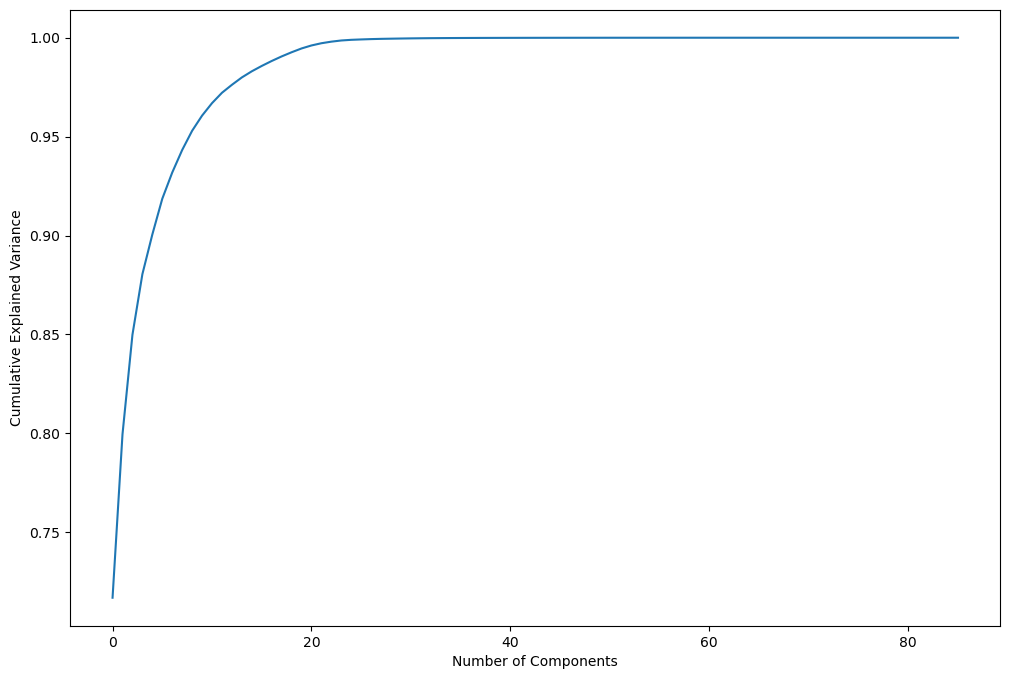

In [60]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [ ]:
merged_data

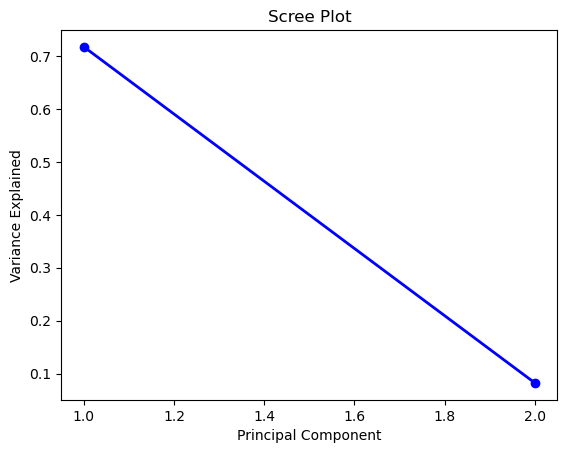

In [56]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
"""Hierchical = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
pred = Hierchical.fit_predict(data)"""

In [ ]:
"""css=[]
# Finding inertia on various k values
for i in range(1,8):
    k_mean=KMeans(n_clusters = i).fit(data)
    css.append(k_mean.inertia_)
    
    
plt.plot(range(1, 8), css, 'bx-', color='green')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('CSS')"""

In [ ]:
"""kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
pred = kmeans.fit_predict(data)
pred"""

In [ ]:
"""sns.countplot(pred)
plt.show()"""

In [ ]:
"""model = AffinityPropagation(damping=0.9)
# fit the model
model.fit(data)
# assign a cluster to each example
yhat = model.predict(data)"""

In [ ]:
""""""merged_data['K-means_Pred'] = pred

In [ ]:
merged_data